In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Cleaned_Mobile_Data.csv")

In [3]:
df

,price,ratings,pagenum,originalprice,discount,brand,processor,rear_camera_mp,front_camera_mp,phone_warranty_category,box_warranty_category,battery_m_ah,display_inches,ram,storage
0,25999,4.6,1,32999,21%,realme,Dimensity 7400 Ultra Processor,50MP,50MP + 8MP,1 Year,1 Year,10001,6.800,8,128
1,7999,4.3,1,9999,20%,MOTOROLA,Helio G81 Processor,50MP,8MP,1 Year,1 Year,7000,6.880,4,64
2,14998,4.4,1,17499,14%,IQOO,Dimensity 6300 Processor,50MP,50MP,1 Year,1 Year,6500,6.700,6,128
3,11998,4.2,1,13999,14%,IQOO,Dimensity 6300 Processor,50MP,50MP,1 Year,No Warranty,6000,6.740,4,128
4,6999,4.3,1,7999,12%,Ai,T615 Processor,50MP,5MP,1 Year,1 Year,5000,6.745,4,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,22999,4.4,41,25999,11%,vivo,Dimensity 6300 Processor,50MP,50MP + 2MP,1 Year,1 Year,6000,6.740,8,128
908,11674,4.1,41,15499,24%,Samsung,MEDIATEK Processor,50MP,50MP,1 Year,1 Year,5000,6.700,4,128
909,43599,4.6,41,45999,5%,OPPO,Dimensity 6300 Processor,50MP,50MP + 50MP + 8MP,1 Year,1 Year,6500,6.590,8,256
910,17999,4.3,41,24999,28%,POCO,Dimensity 7300 Ultra Processor,50MP,50MP + 8MP + 2MP,1 Year,1 Year,5500,6.670,8,128


In [4]:
df.isnull().sum()

price                      0
ratings                    0
pagenum                    0
originalprice              0
discount                   0
brand                      0
processor                  0
rear_camera_mp             0
front_camera_mp            0
phone_warranty_category    0
box_warranty_category      0
battery_m_ah               0
display_inches             0
ram                        0
storage                    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Univariate Analysis

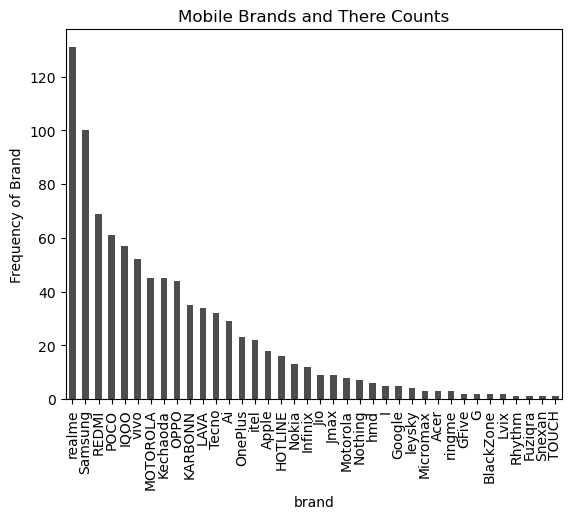

In [6]:
plt.figure()
df["brand"].value_counts().plot(kind = "bar",color = "0.3")
plt.title("Mobile Brands and There Counts")
plt.ylabel("Frequency of Brand")
plt.show()

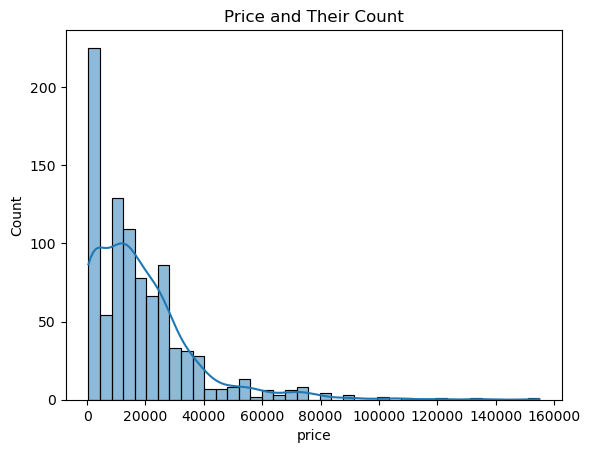

In [7]:
sns.histplot(data = df , x = "price",kde = True)
plt.title("Price and Their Count")
plt.show()

Outlier Detection

#### Finding Outliers By Using IQR : Inter Quartile Range

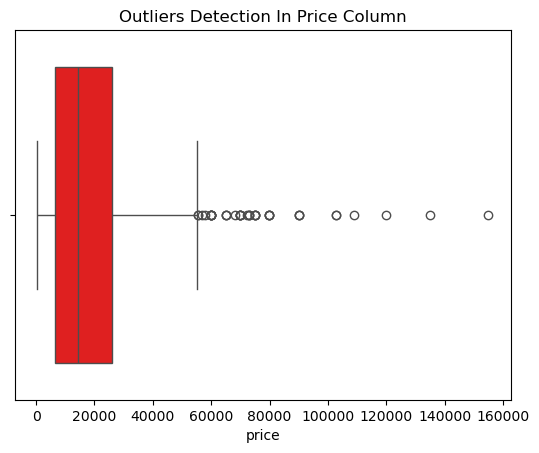

In [8]:
sns.boxplot(x = df["price"] ,data = df,color = "r")
plt.title("Outliers Detection In Price Column")
plt.show()

In [9]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

In [10]:
print("q1:",q1)
print("q3:",q3)
print("iqr:",iqr)


q1: 6574.0
q3: 25999.0
iqr: 19425.0


In [11]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

In [12]:
print("Upper_limit:",upper_limit)
print("lower_limit:",lower_limit)

Upper_limit: 55136.5
lower_limit: -22563.5


In [13]:
outliers = df[(df["price"] < lower_limit) | (df["price"] > upper_limit)]
outliers

,price,ratings,pagenum,originalprice,discount,brand,processor,rear_camera_mp,front_camera_mp,phone_warranty_category,box_warranty_category,battery_m_ah,display_inches,ram,storage
172,64999,4.5,8,79999,18%,MOTOROLA,Snapdragon 8 Gen 5 Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,5200,6.80,16,512
204,64900,4.6,17,69900,7%,Apple,A16 Bionic Chip,50MP,12MP,1 Year,1 Year,5500,6.10,256,0
260,59999,4.7,12,79999,25%,vivo,Dimensity 9400+ Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,6200,6.67,12,256
261,69999,4.7,12,87999,20%,vivo,Dimensity 9400+ Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,6200,6.67,12,512
288,69999,4.7,13,87999,20%,vivo,Dimensity 9400+ Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,6200,6.67,12,512
298,69999,4.5,14,84999,17%,MOTOROLA,Snapdragon 8 Gen 5 Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,5200,6.80,16,0
345,59999,4.4,16,74999,20%,MOTOROLA,Snapdragon 8 Gen 5 Processor,50MP,50MP + 50MP + 50MP,1 Year,1 Year,5200,6.80,12,256
367,79900,4.6,15,32999,21%,Apple,A18 Chip,50MP,12MP,1 Year,1 Year,5500,6.10,256,0
396,69900,4.6,8,32999,21%,Apple,A18 Chip,50MP,12MP,1 Year,1 Year,5500,6.10,128,0
401,79900,4.6,23,32999,21%,Apple,A18 Chip,50MP,12MP,1 Year,1 Year,5500,6.70,128,0


In [14]:
#Treating Outliers by capping the data 
new_df = df.copy()
new_df.loc[(new_df["price"] > upper_limit),"price"] = upper_limit
new_df.loc[(new_df["price"] < lower_limit),"price"] = lower_limit

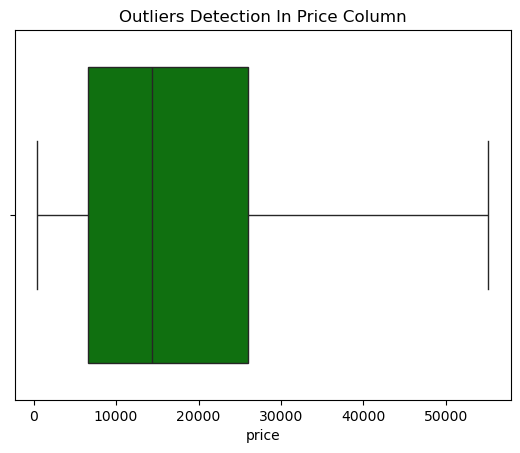

In [15]:
sns.boxplot(x = new_df["price"] ,data = df,color = "g")
plt.title("Outliers Detection In Price Column")
plt.show()

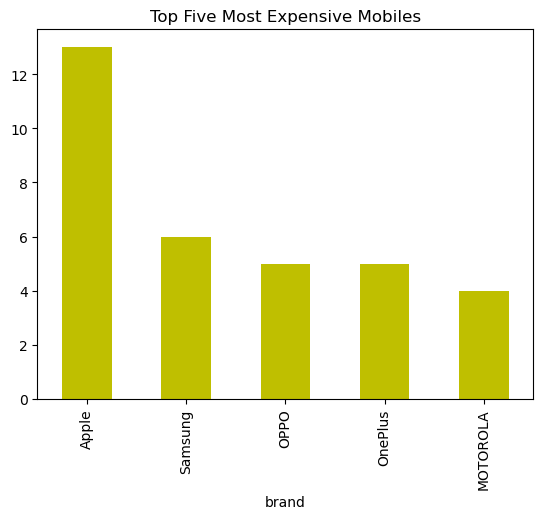

In [38]:
outliers["brand"].value_counts().head().plot(kind = "bar", color = "y")
plt.title("Top Five Most Expensive Mobiles")
plt.show()


### Piechart

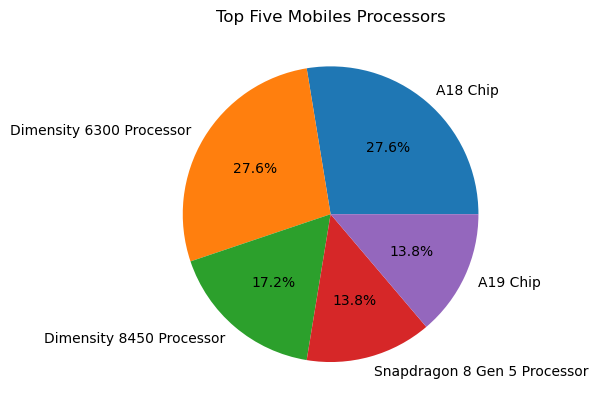

In [17]:
brand_counts = outliers["processor"].value_counts().head()
plt.figure()
plt.title("Top Five Mobiles Processors")
plt.pie(brand_counts, labels = brand_counts.index, autopct='%1.1f%%')
plt.show()

# Biavaraite Analysis

### Numerical vs Numerical Columns

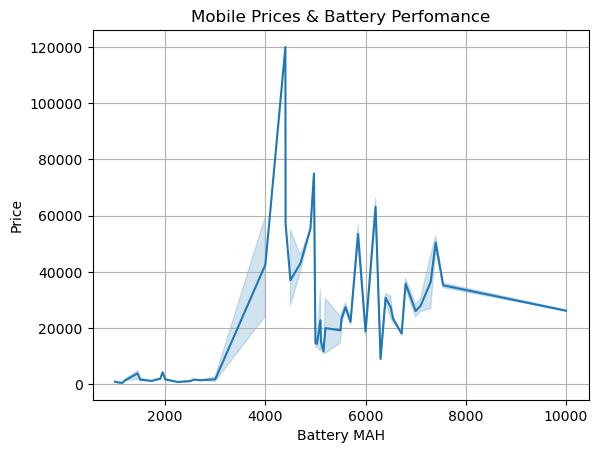

In [39]:
plt.figure()
sns.lineplot( data = df , x = "battery_m_ah" , y = "price")
plt.title("Mobile Prices & Battery Perfomance")
plt.xlabel("Battery MAH")
plt.ylabel("Price")
plt.grid()
plt.show()

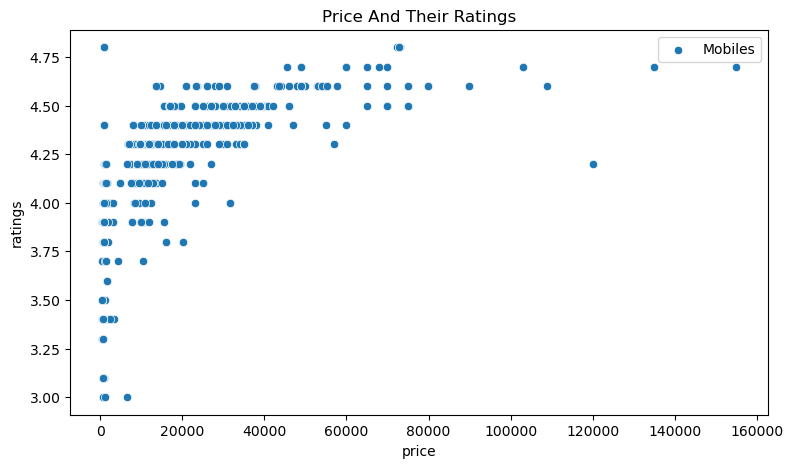

In [19]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='price', y='ratings', data=df,label = "Mobiles")
plt.title('Price And Their Ratings')
plt.legend()
plt.show()

### Numerical Vs Categorical Columns

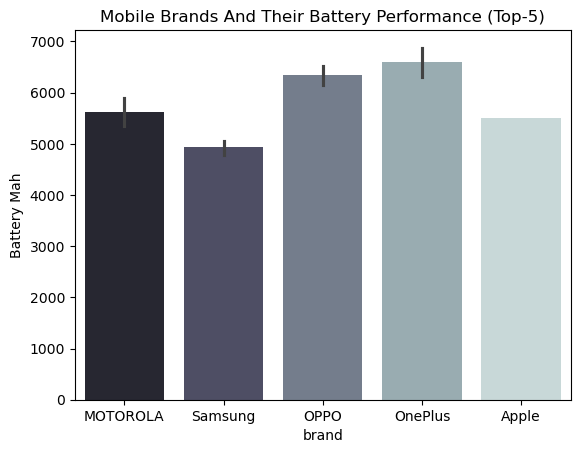

In [20]:
top_10_names = outliers["brand"].value_counts().head(5).index

df_filtered = df[df["brand"].isin(top_10_names)]

plt.figure()
sns.barplot(data=df_filtered,  x="brand",  y="battery_m_ah", palette="bone")
plt.title("Mobile Brands And Their Battery Performance (Top-5)")
plt.ylabel("Battery Mah")
plt.show()


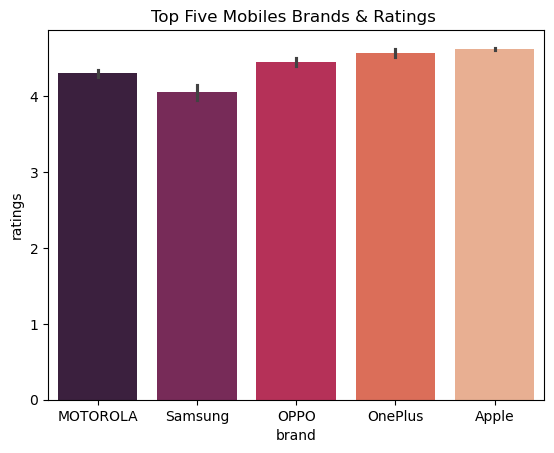

In [21]:
top_10_names = outliers["brand"].value_counts().head(5).index

df_filtered = df[df["brand"].isin(top_10_names)]
plt.figure()
sns.barplot(data=df_filtered,  x="brand",  y="ratings", palette="rocket")
plt.title("Top Five Mobiles Brands & Ratings ")
plt.show()

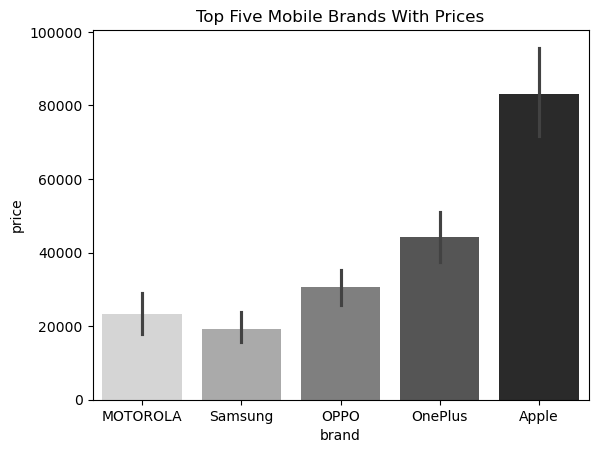

In [35]:
plt.figure()
sns.barplot(x='brand', y='price', data=df_filtered, palette = "binary")
plt.title('Top Five Mobile Brands With Prices')
plt.show()

### Categorical vs Categorical

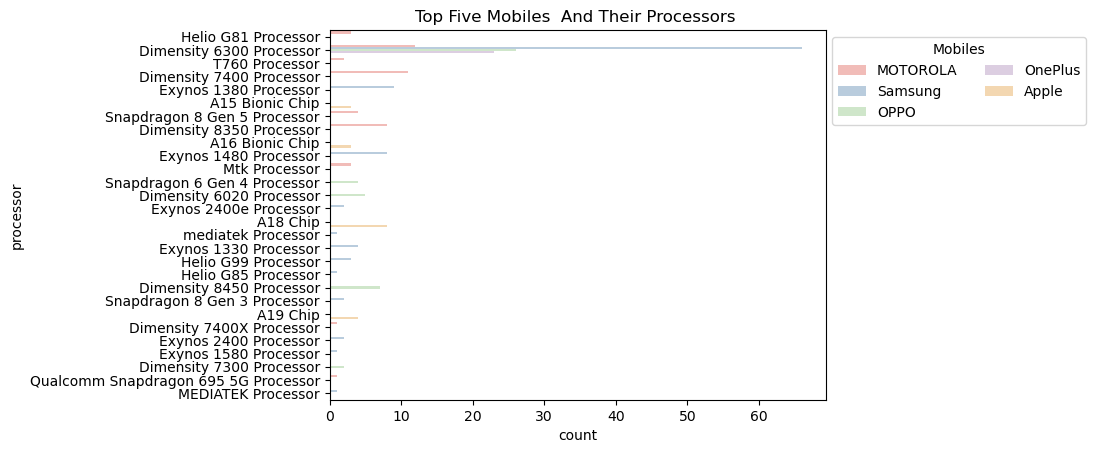

In [36]:
plt.figure()
sns.countplot( data = df_filtered , y = "processor" , hue = "brand",palette = "Pastel1")
plt.title("Top Five Mobiles  And Their Processors ")
plt.legend(title="Mobiles",ncol = 2,bbox_to_anchor=(1,1))
plt.show()


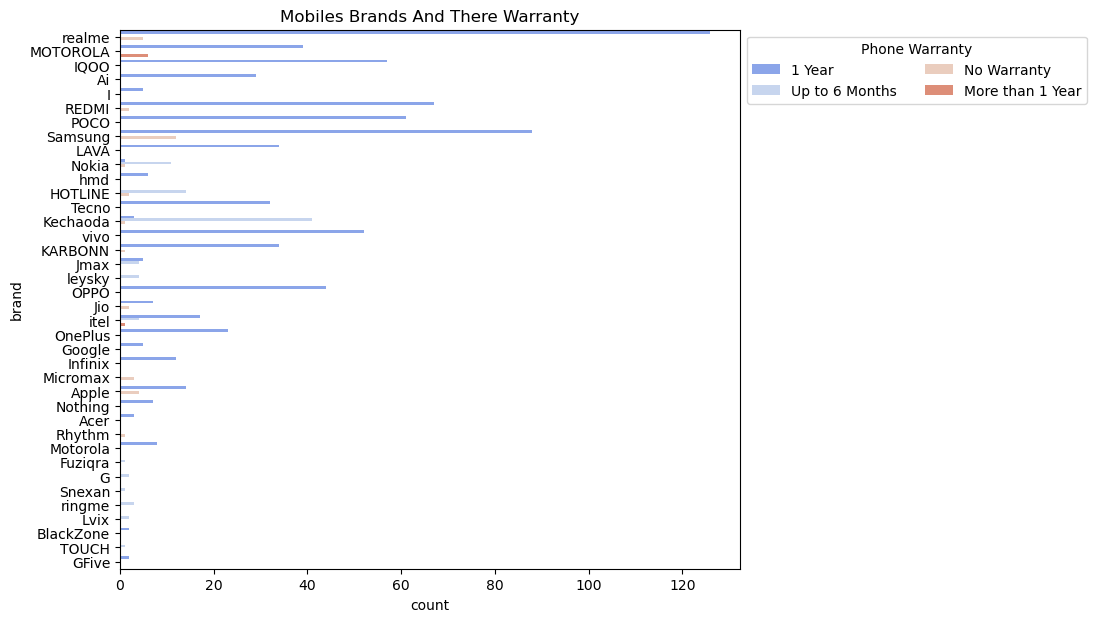

In [24]:
plt.figure(figsize=(8,7))
sns.countplot( data = df , y = "brand" , hue = "phone_warranty_category",palette = "coolwarm")
plt.title("Mobiles Brands And There Warranty")
plt.legend(title="Phone Warranty",ncol = 2,bbox_to_anchor=(1,1))
plt.show()

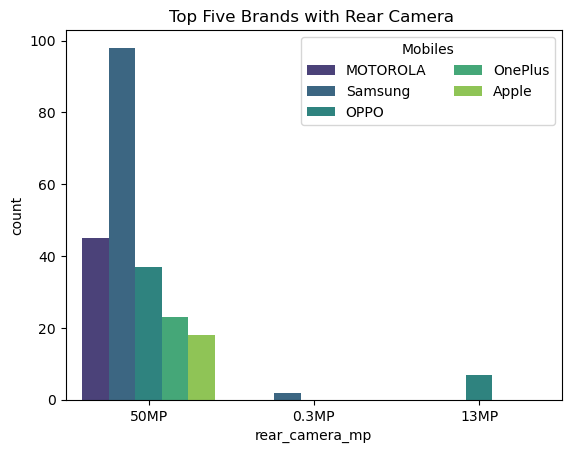

In [37]:
plt.figure()
sns.countplot( data = df_filtered , x = "rear_camera_mp" , hue = "brand",palette = "viridis")
plt.title("Top Five Brands with Rear Camera ")
plt.legend(title="Mobiles",ncol = 2,bbox_to_anchor=(1,1))
plt.show()

### Multivariate Analysis

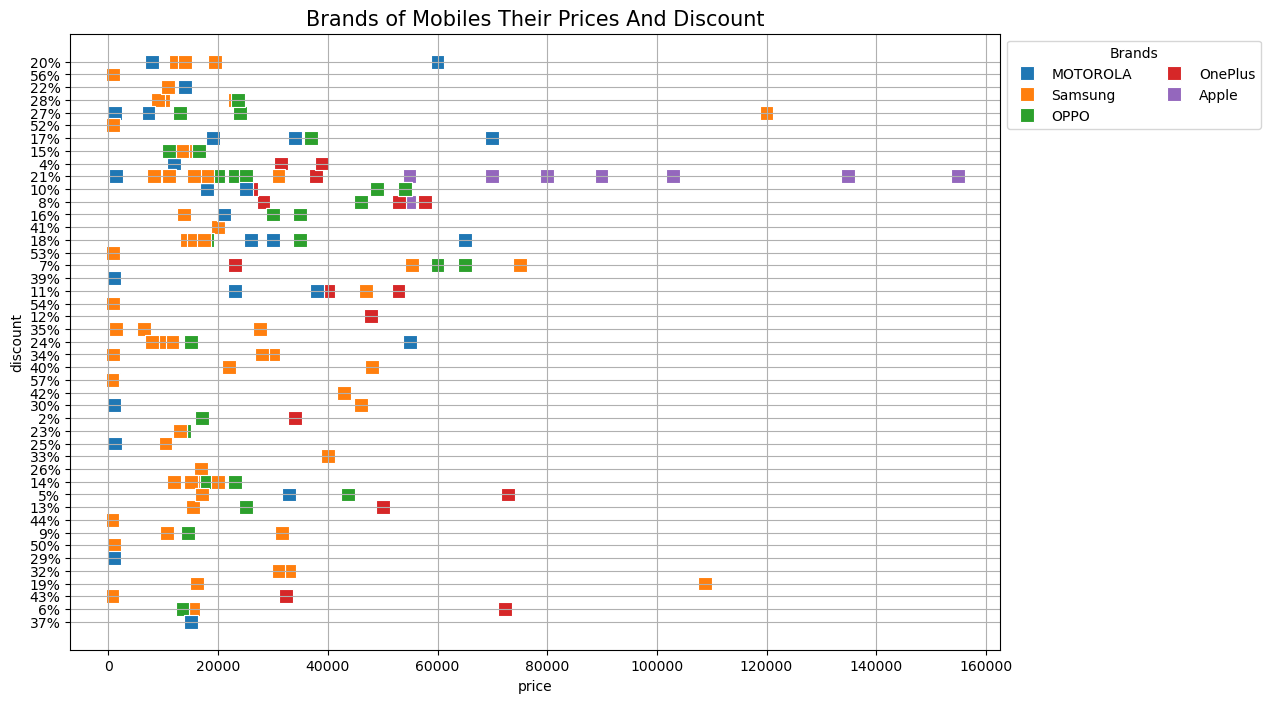

In [26]:
plt.figure(figsize=(12,8))
plt.title("Brands of Mobiles Their Prices And Discount",fontsize =15) 
sns.scatterplot( y ="discount" , x = "price" , hue = "brand",data = df_filtered,marker = "s",s = 100)
plt.legend(title="Brands",ncol=2,bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

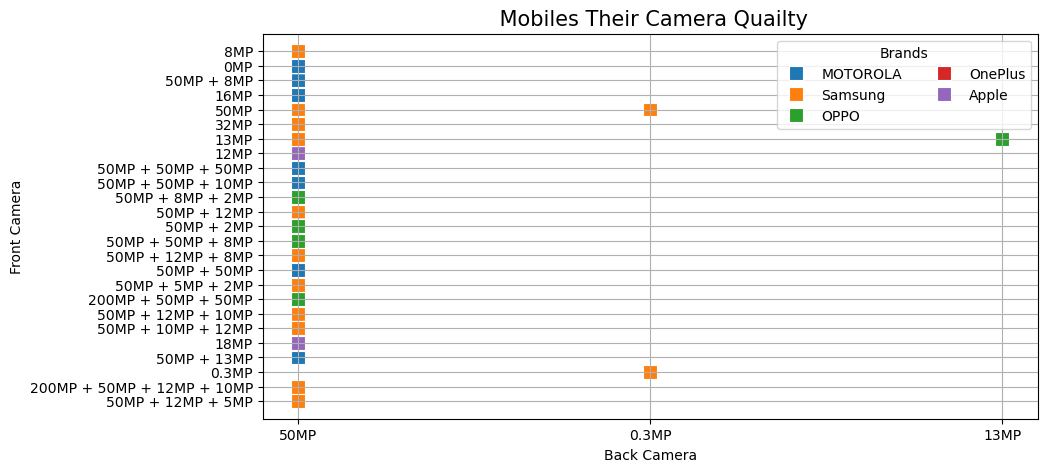

In [27]:
plt.figure(figsize=(10,5))
plt.title(" Mobiles Their Camera Quailty",fontsize =15) 
sns.scatterplot( x ="rear_camera_mp" , y = "front_camera_mp" , hue = "brand",data = df_filtered,marker = "s",s = 100)
plt.legend(title="Brands",ncol=2,bbox_to_anchor=(1, 1))
plt.xlabel("Back Camera")
plt.ylabel("Front Camera")
plt.grid()
plt.show()

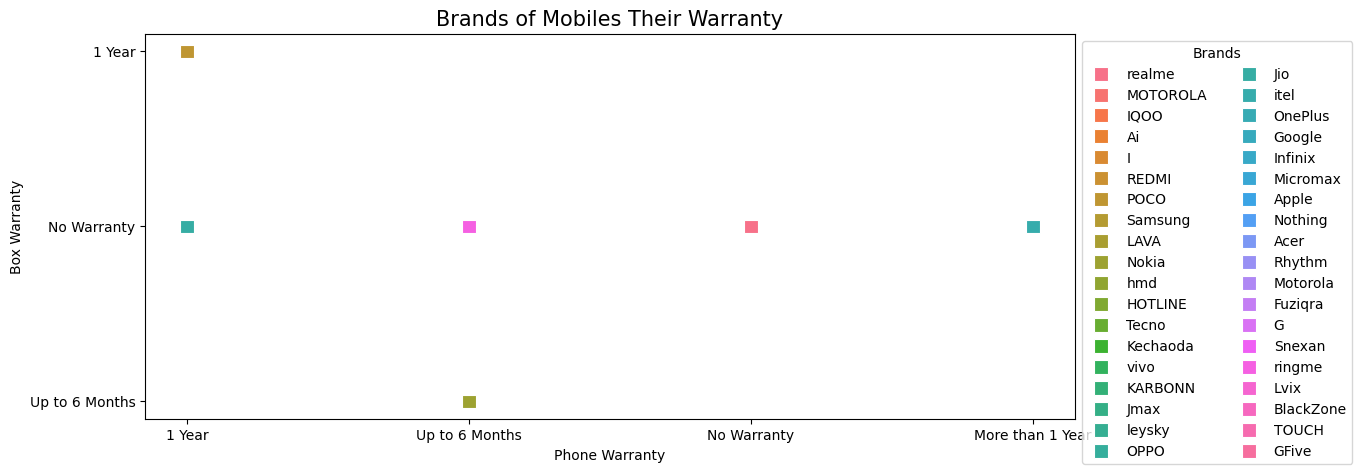

In [28]:
plt.figure(figsize=(12,5))
plt.title("Brands of Mobiles Their Warranty",fontsize =15) 
sns.scatterplot( x ="phone_warranty_category" , y = "box_warranty_category" , hue = "brand",data = df,marker = "s",s = 100)
plt.legend(title="Brands",ncol=2,bbox_to_anchor=(1, 1))
plt.xlabel("Phone Warranty")
plt.ylabel("Box Warranty")
plt.show()

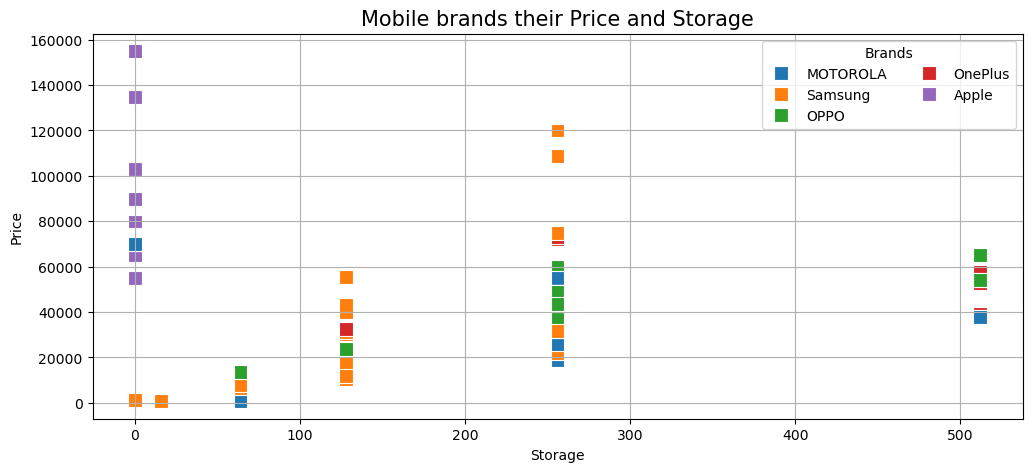

In [29]:
plt.figure(figsize=(12,5))
plt.title("Mobile brands their Price and Storage",fontsize =15) 
sns.scatterplot( y ="price" , x = "storage" , hue = "brand",data = df_filtered,marker = "s",s = 100)
plt.legend(title="Brands",ncol=2,bbox_to_anchor=(1, 1))
plt.grid()
plt.ylabel("Price")
plt.xlabel("Storage")
plt.show()

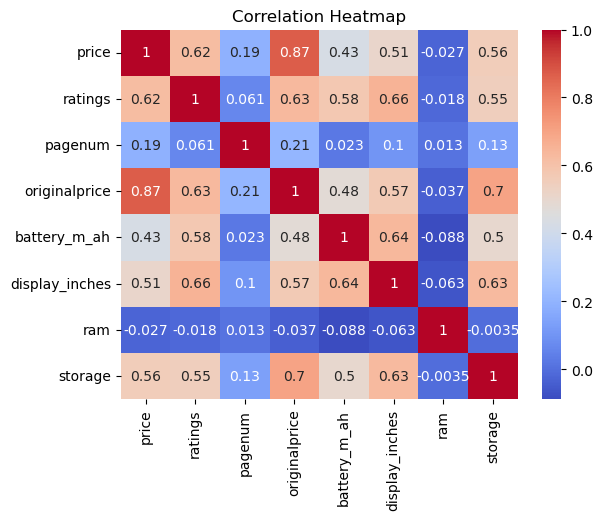

In [30]:
sns.heatmap(df.select_dtypes(include = "number").corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()